<a href="https://colab.research.google.com/github/putrinahampun/StartupCampusJourney/blob/main/Assignments/04_03_Fire_Putri_Yanti_Nahampun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Loading MNIST Dataset:

*   Define data transformation to normalize the data  
*   Load the data and split into 2 part, train data and test data.



In [24]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define data transformations
# using the default value for the parameter value of Normalize.
data_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Download and load the MNIST training dataset
train_dataset = datasets.MNIST(root='./data', train=True, transform=data_transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Download and load the MNIST testing dataset
test_dataset = datasets.MNIST(root='./data', train=False, transform=data_transform, download=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


## Visualize MNSIT Dataset

*   This section is to visualize the data to know what the data looks like.
*   The data have 10 labels



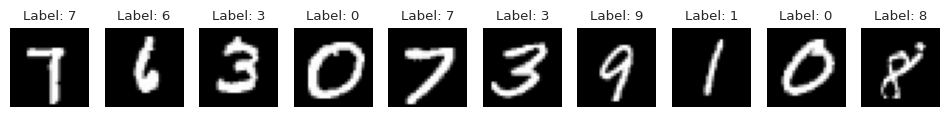

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Function to visualize a batch of images
def visualize_images(images, labels):
    fig, axes = plt.subplots(1, len(images), figsize=(12, 3))
    for i, (image, label) in enumerate(zip(images, labels)):
        axes[i].imshow(np.squeeze(image), cmap='gray')
        axes[i].set_title(f'Label: {label.item()}')
        axes[i].axis('off')
    plt.show()

# Get a batch of images and labels
images, labels = next(iter(train_loader))
visualize_images(images[:10], labels[:10])


## Design Neural Network Model:
*   Create a simple neural network model.
*   Image has size 28 x 28 grid of pixels, 128 is the number of output feature or neurons
*   Data have 10 labels

In [26]:
import torch.nn as nn
import torch.nn.functional as F

# Define your neural network model
class modelNN(nn.Module):
    def __init__(self):
        super(modelNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 10) # because there are 10 labels.

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the input
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

# Instantiate the model
model = modelNN()


## Setup Hyperparameters
*  Using crossentropy for multiclassification task
*  Using Adam with learning rate = 0.01

In [30]:
import torch.optim as optim

# Define hyperparameters
criterion = nn.CrossEntropyLoss() # crossentropy for multiclassification task
optimizer = optim.Adam(model.parameters(), lr=0.01)


## Training Loop

In [31]:
# Training loop
def train_model(model, train_loader, criterion, optimizer, epochs=5):
    for epoch in range(epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        print(f'Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader)}')

# Run the training loop
train_model(model, train_loader, criterion, optimizer, epochs=5)


Epoch 1/5, Loss: 0.38559019498066355
Epoch 2/5, Loss: 0.25176770479551386
Epoch 3/5, Loss: 0.24917650298833022
Epoch 4/5, Loss: 0.24158025391574608
Epoch 5/5, Loss: 0.24182356571329872


## Evaluate Model

Accuracy: 0.9203


Confusion Matrix


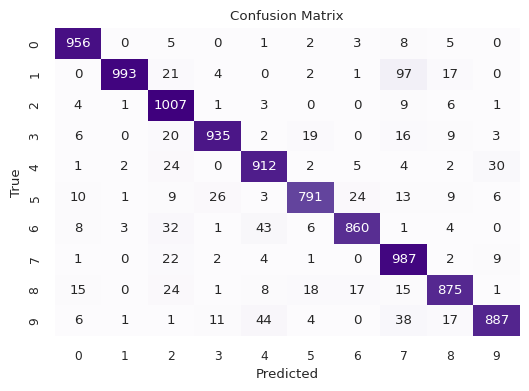



Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.99      0.87      0.93      1135
           2       0.86      0.98      0.92      1032
           3       0.95      0.93      0.94      1010
           4       0.89      0.93      0.91       982
           5       0.94      0.89      0.91       892
           6       0.95      0.90      0.92       958
           7       0.83      0.96      0.89      1028
           8       0.92      0.90      0.91       974
           9       0.95      0.88      0.91      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

# Function to evaluate the model
def evaluate_model(model, test_loader):
    model.eval()
    all_labels = []
    all_predictions = []

    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predictions = torch.max(outputs, 1)
            all_labels.extend(labels.numpy())
            all_predictions.extend(predictions.numpy())

    accuracy = accuracy_score(all_labels, all_predictions)
    confusion_mat = confusion_matrix(all_labels, all_predictions)
    classification_rep = classification_report(all_labels, all_predictions)

    print(f'Accuracy: {accuracy}')
    print('\n')
    # Showing the Confusion matrix
    print("Confusion Matrix")
    plt.figure(figsize=(6, 4))
    sns.set(font_scale=0.8)
    sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Purples", cbar=False)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()
    print('\n')
    print(f'Classification Report:\n{classification_rep}')

# Evaluate the model
evaluate_model(model, test_loader)
